In [76]:
import pandas as pd
import matplotlib.pyplot as plt

file = r"C:\Users\Utente\Desktop\Fast Github Repos\FDS-Project\cleaned_data_new.csv"
df = pd.read_csv(file, low_memory=False)
df

,Password,Strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669873,10redtux10,1
669874,infrared1,1
669875,184520socram,1
669876,marken22a,1


---

As the number of feature is a critical factor in the training time of the algorithm we want to explore how the password length is distribuited along the dataset.

---

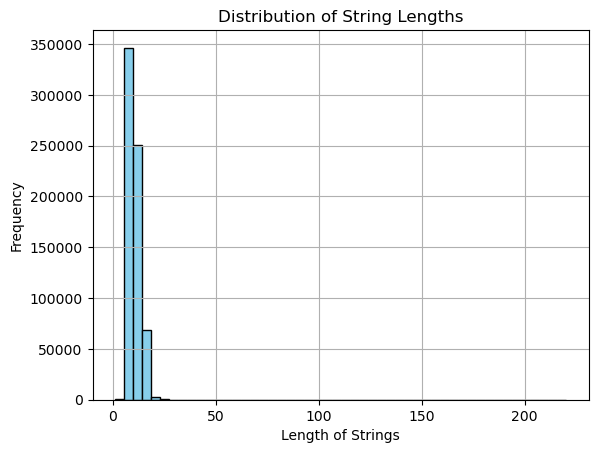

In [77]:
string_lengths = df['Password'].str.len()

plt.hist(string_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of String Lengths')
plt.xlabel('Length of Strings')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


---

We can see that few outliers increase greatly our max password lenght. We may want to reduce the number max length of those longest password. We search for a good compromise:

---

In [78]:
print(string_lengths.quantile(0.9999))
(string_lengths[string_lengths > 30].shape[0])

30.0


35

---

We see that only  35 entries have a length greater than 30. We will cut those strings.

---

In [79]:
df['Password'] = df['Password'].str.slice(0, 30)
max_length = df['Password'].str.len().max()
max_length

30

---

And we finally create our dataset of characters:

---

In [80]:
position_df = pd.DataFrame(df['Password'].apply(lambda row: list(row.ljust(max_length))).tolist())
position_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,k,z,d,e,5,5,7,7,,,...,,,,,,,,,,
1,k,i,n,o,3,4,3,4,,,...,,,,,,,,,,
2,v,i,s,i,7,k,1,y,r,,...,,,,,,,,,,
3,m,e,g,z,y,1,2,3,,,...,,,,,,,,,,
4,l,a,m,b,o,r,g,h,i,n,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669873,1,0,r,e,d,t,u,x,1,0,...,,,,,,,,,,
669874,i,n,f,r,a,r,e,d,1,,...,,,,,,,,,,
669875,1,8,4,5,2,0,s,o,c,r,...,,,,,,,,,,
669876,m,a,r,k,e,n,2,2,a,,...,,,,,,,,,,


---

Convert each char to ASCII:

---

In [81]:
position_df = position_df.map(lambda x: ord(x))
position_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,107,122,100,101,53,53,55,55,32,32,...,32,32,32,32,32,32,32,32,32,32
1,107,105,110,111,51,52,51,52,32,32,...,32,32,32,32,32,32,32,32,32,32
2,118,105,115,105,55,107,49,121,114,32,...,32,32,32,32,32,32,32,32,32,32
3,109,101,103,122,121,49,50,51,32,32,...,32,32,32,32,32,32,32,32,32,32
4,108,97,109,98,111,114,103,104,105,110,...,32,32,32,32,32,32,32,32,32,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669873,49,48,114,101,100,116,117,120,49,48,...,32,32,32,32,32,32,32,32,32,32
669874,105,110,102,114,97,114,101,100,49,32,...,32,32,32,32,32,32,32,32,32,32
669875,49,56,52,53,50,48,115,111,99,114,...,32,32,32,32,32,32,32,32,32,32
669876,109,97,114,107,101,110,50,50,97,32,...,32,32,32,32,32,32,32,32,32,32


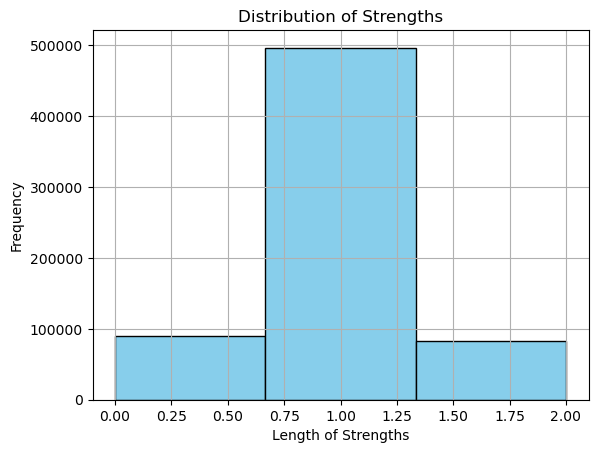

In [82]:
strenghts = df["Strength"]
strenghts

plt.hist(strenghts, bins=3, color='skyblue', edgecolor='black')
plt.title('Distribution of Strengths')
plt.xlabel('Length of Strengths')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

---

In [83]:
df[df["Strength"] == 1].shape[0] / df.shape[0]

0.7416290727565318